In [51]:
import numpy as np
import sep
# additional setup for reading the test image and displaying plots
#import fitsio
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as patches
from skimage.transform import rotate

%matplotlib inline

rcParams['figure.figsize'] = [18., 15.]

In [52]:
# read image into standard 2-d numpy array
hdu = fits.open("../maps_fits/b'iDR4_3_MC0114_0562811'_halpha_v1.fits")
hdu[0].data

array([[1.e-17, 1.e-17, 1.e-17, ..., 1.e-17, 1.e-17, 1.e-17],
       [1.e-17, 1.e-17, 1.e-17, ..., 1.e-17, 1.e-17, 1.e-17],
       [1.e-17, 1.e-17, 1.e-17, ..., 1.e-17, 1.e-17, 1.e-17],
       ...,
       [1.e-17, 1.e-17, 1.e-17, ..., 1.e-17, 1.e-17, 1.e-17],
       [1.e-17, 1.e-17, 1.e-17, ..., 1.e-17, 1.e-17, 1.e-17],
       [1.e-17, 1.e-17, 1.e-17, ..., 1.e-17, 1.e-17, 1.e-17]],
      dtype=float32)

In [53]:
# Define your custom color gradient
colors = [(0, 'blue'), (0.5, 'green'), (1, 'red')]  # Example color sequence
custom_cmap = LinearSegmentedColormap.from_list('custom_colormap', colors)

In [54]:
# Assuming you want to create a horizontal slit at position y=100, spanning from x=20 to x=42
y = 30
start_x = 20
end_x = 42

# Create the pseudo-slit mask
slit_mask = np.zeros_like(hdu[0].data)
slit_mask[y, start_x:end_x] = 1  # Setting pixels within the slit region to 1
slit_mask 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [55]:
# Measure the flux within the pseudo-slit
flux_within_slit = np.sum(hdu[0].data * slit_mask)

print("Flux within the pseudo-slit:", hdu[0].data * slit_mask)
print("Maximun flux within the pseudo-slit:", (hdu[0].data * slit_mask).max())
print("Total flux within the pseudo-slit:", flux_within_slit)

Flux within the pseudo-slit: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Maximun flux within the pseudo-slit: 2.4398725e-14
Total flux within the pseudo-slit: 1.2603785e-13


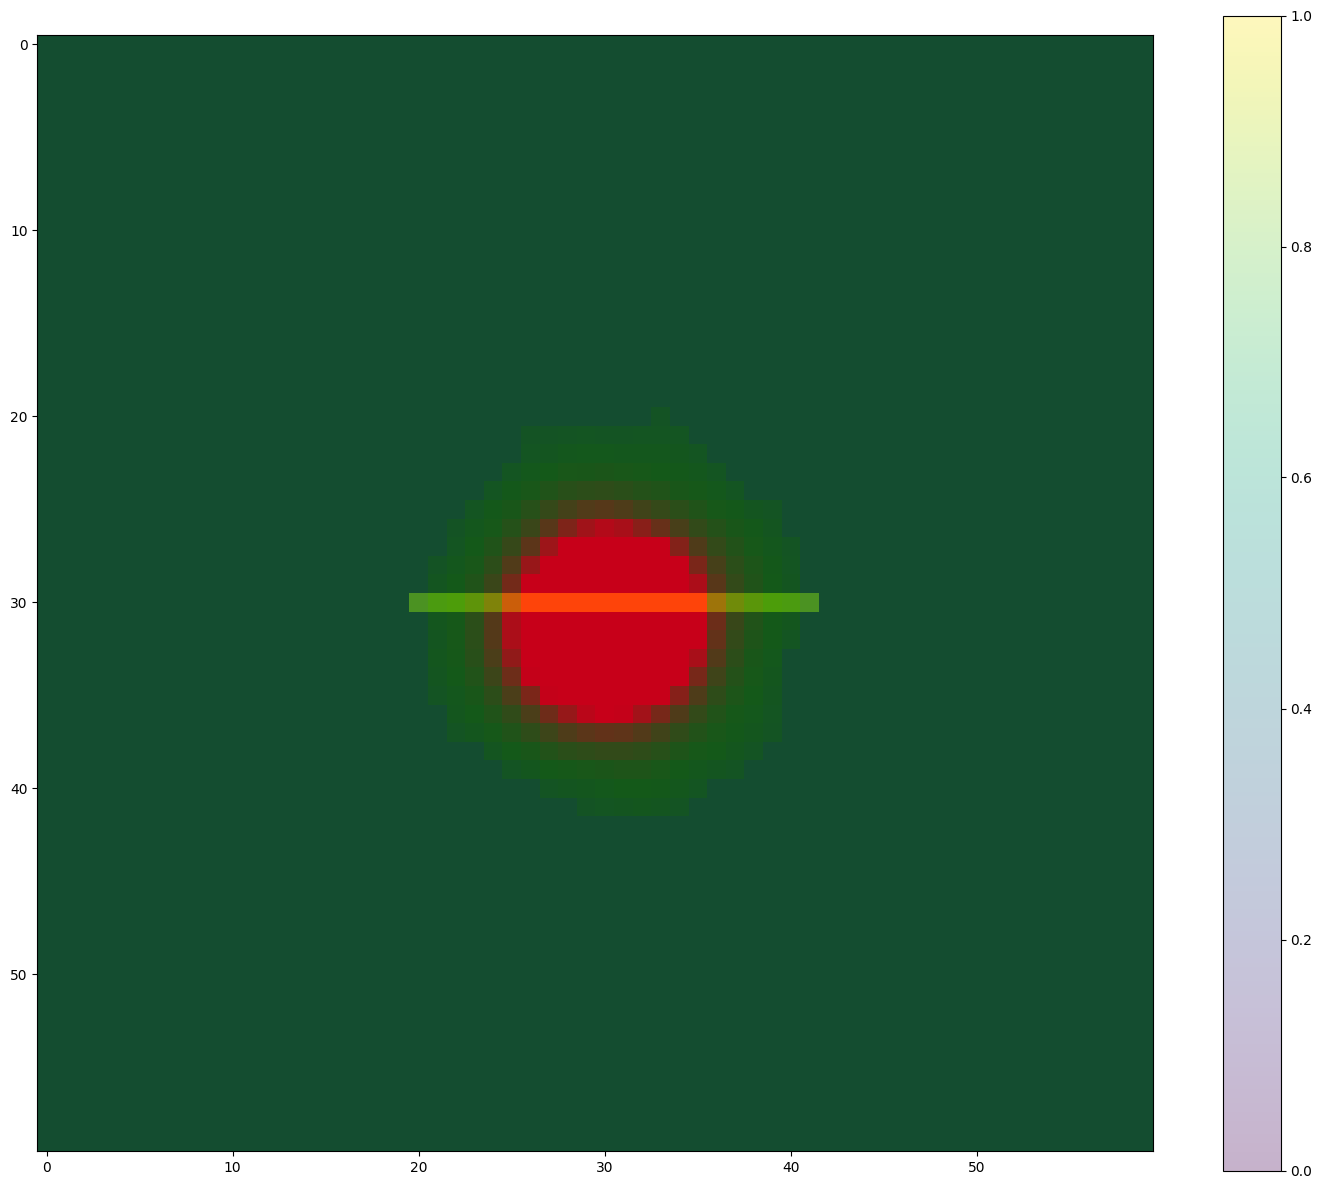

In [56]:
# show the image
m, s = np.mean(hdu[0].data), np.std(hdu[0].data)
plt.imshow(hdu[0].data, interpolation='nearest', cmap=custom_cmap, vmin=m-s, vmax=m+s, origin='lower')

# Highlight the pseudo-slit by overlaying it on the image
plt.imshow(slit_mask, cmap='viridis', alpha=0.3)  # Using a different colormap for clarity
plt.colorbar();
#plt.savefig("difference_Ha.jpg")

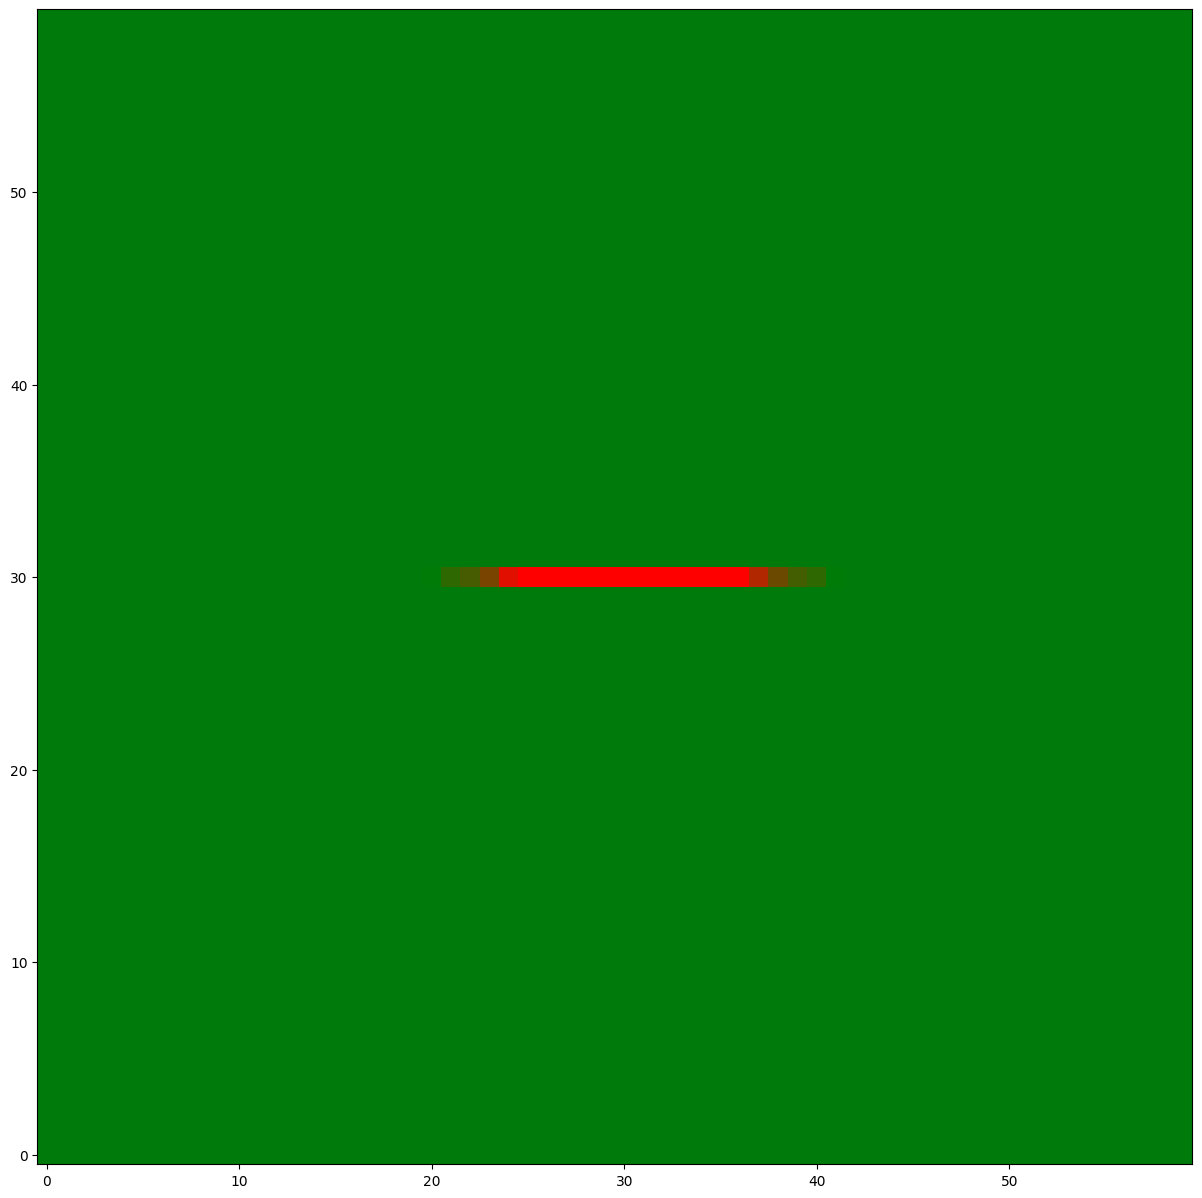

In [57]:
# show the image
m, s = np.mean(hdu[0].data * slit_mask), np.std(hdu[0].data * slit_mask)
plt.imshow(hdu[0].data * slit_mask, interpolation='nearest', cmap=custom_cmap, vmin=m-s, vmax=m+s, origin='lower')


# Creating seudo-slit 

In [80]:
#Assuming the original values
y1 = 30  # y-coordinate of the pseudo-slit (start)
start_x1 = 20  # Starting x-coordinate
end_x1= 42  # Ending x-coordinate

# Adjust the length (vertical extent) of the pseudo-slit
new_y = 30  # New y-coordinate of the pseudo-slit start
height = 3  # Define the height (vertical length) of the slit

# Create a new pseudo-slit with adjusted length
slit_mask1 = np.zeros_like(hdu[0].data)
slit_mask1[new_y:new_y + height, start_x1:end_x1] = 1  # Setting pixels within the new slit length to 1

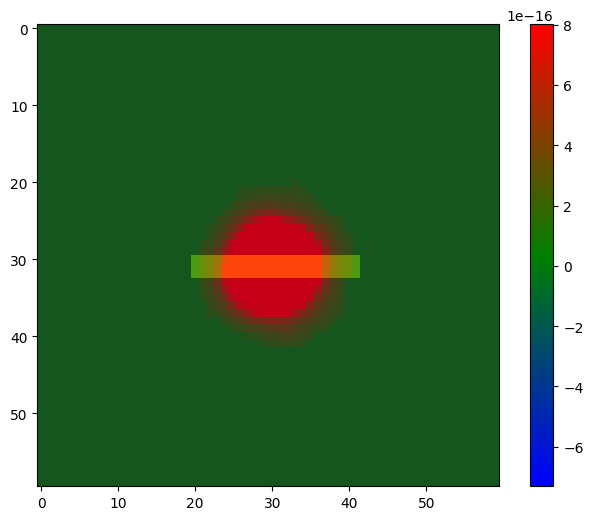

In [81]:
# Display the image with the new pseudo-slit length
plt.figure(figsize=(8, 6))
plt.imshow(hdu[0].data, interpolation='nearest', cmap=custom_cmap, vmin=m-s, vmax=m+s, origin='lower')  # Display the image
plt.colorbar()  # Show a colorbar for reference
plt.imshow(slit_mask1, cmap='viridis', alpha=0.3)  # Highlight the new pseudo-slit